In [2]:
!pip install networkx scikit-learn matplotlib numpy

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [14]:
import os

# Define o nome da pasta onde as imagens serão salvas
output_folder = 'outputs'

# Verifica se a pasta já existe. Se não existir, ela será criada.
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
    print(f"Pasta '{output_folder}' criada com sucesso!")
else:
    print(f"Pasta '{output_folder}' já existe.")

# Agora você pode prosseguir com o restante do seu código.

Pasta 'outputs' criada com sucesso!


In [17]:
# Criando um grafo vazio
G = nx.Graph()

# Adicionando nós (bairros/locais de entrega).
# Usaremos letras para simplificar, mas poderiam ser nomes de bairros reais.
G.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F', 'G'])

# Adicionando arestas (ruas) com pesos (distância ou tempo estimado)
# Formato: (nó_origem, nó_destino, peso_da_aresta)
arestas_com_pesos = [
    ('A', 'B', 4), ('A', 'C', 2),
    ('B', 'D', 5), ('B', 'E', 3),
    ('C', 'D', 8), ('C', 'F', 6),
    ('D', 'E', 1), ('D', 'G', 10),
    ('E', 'F', 7),
    ('F', 'G', 9)
]

# Adicionar as arestas com seus pesos ao grafo
for u, v, peso in arestas_com_pesos:
    G.add_edge(u, v, weight=peso)

print("Grafo criado com sucesso!")
print(f"Nós do grafo: {G.nodes()}")
print(f"Arestas do grafo (com pesos): {G.edges(data=True)}")

Grafo criado com sucesso!
Nós do grafo: ['A', 'B', 'C', 'D', 'E', 'F', 'G']
Arestas do grafo (com pesos): [('A', 'B', {'weight': 4}), ('A', 'C', {'weight': 2}), ('B', 'D', {'weight': 5}), ('B', 'E', {'weight': 3}), ('C', 'D', {'weight': 8}), ('C', 'F', {'weight': 6}), ('D', 'E', {'weight': 1}), ('D', 'G', {'weight': 10}), ('E', 'F', {'weight': 7}), ('F', 'G', {'weight': 9})]


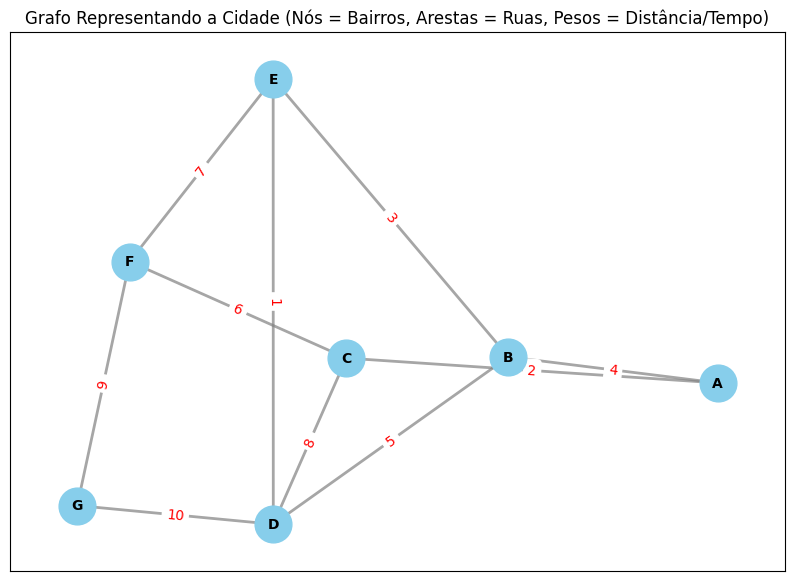

In [23]:
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')
nx.draw_networkx_edges(G, pos, width=2, alpha=0.7, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
plt.title("Grafo Representando a Cidade (Nós = Bairros, Arestas = Ruas, Pesos = Distância/Tempo)")
# LINHA PARA SALVAR A IMAGEM - AGORA VAI FUNCIONAR!
plt.savefig('outputs/grafo_visualizado.png')
plt.show()

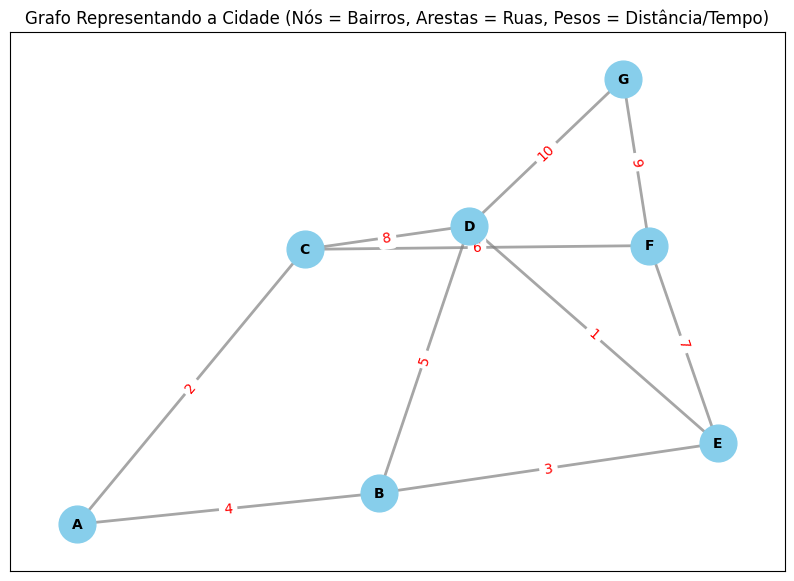

In [24]:
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')
nx.draw_networkx_edges(G, pos, width=2, alpha=0.7, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
plt.title("Grafo Representando a Cidade (Nós = Bairros, Arestas = Ruas, Pesos = Distância/Tempo)")
# LINHA PARA SALVAR A IMAGEM - AGORA VAI FUNCIONAR!
plt.savefig('outputs/grafo_visualizado.png')
plt.show()

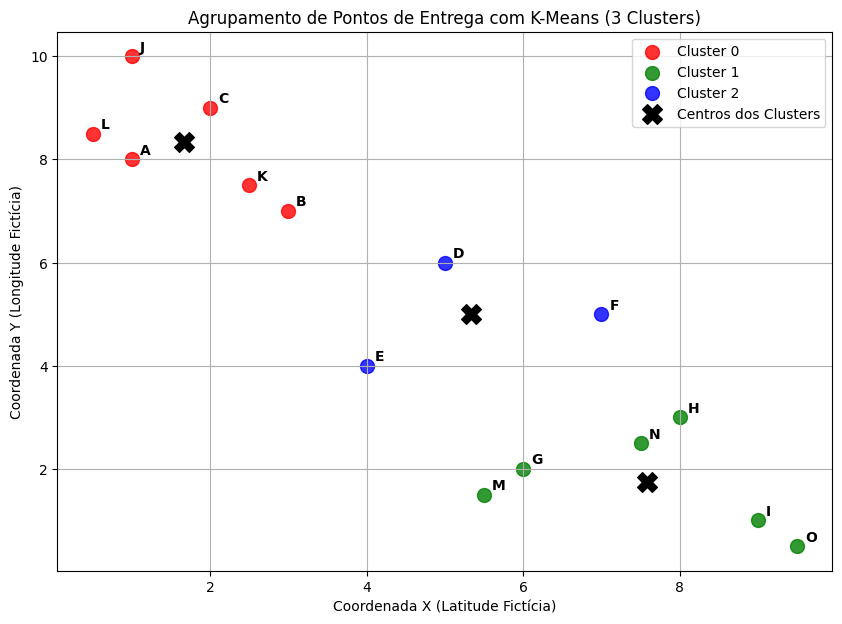

In [25]:
# ... (todo o código de cálculo do K-Means) ...

# --- Visualização dos Clusters ---
plt.figure(figsize=(10, 7))
colors = ['red', 'green', 'blue', 'purple', 'orange', 'brown', 'pink']
for i in range(n_clusters):
    cluster_points = X[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i], label=f'Cluster {i}', s=100, alpha=0.8)
plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200, color='black', label='Centros dos Clusters')
for i, ponto in enumerate(pontos_nomes):
    plt.annotate(ponto, (X[i, 0] + 0.1, X[i, 1] + 0.1), fontsize=10, weight='bold')
plt.title(f"Agrupamento de Pontos de Entrega com K-Means ({n_clusters} Clusters)")
plt.xlabel("Coordenada X (Latitude Fictícia)")
plt.ylabel("Coordenada Y (Longitude Fictícia)")
plt.legend()
plt.grid(True)
# LINHA PARA SALVAR A IMAGEM - AGORA VAI FUNCIONAR!
plt.savefig('outputs/agrupamento_kmeans.png')
plt.show()